# Brazilian Public E-commerce Dataset Analysis

### By: Ivan Berlim Gonçalves - Data Scientist

This project objective is to consolidate the acquired knowledge that i obtained studying data science in the last month.<br />
I'll follow the Cross Industry Standard Processes (CRISP-DM): **Business Understanding, Data Understanding, Data Preparation, Modeling and Evaluation**

<img src="https://miro.medium.com/max/494/0*tA5OjppLK627FfFo" alt="drawing" width="450"/>

<center><b>Figure 1</b> - Cross Industry Standard Processes for Data Mining (CRISP-DM)</center>

This is a medium term project and as long as i learn new things, i'll be updating this project

## Business Understanding

In the scope of this project, i'll consider that my solution will aim decision makers, so i'll focus on triyng to answer some **business questions** about how and why the maketplace sales indicators are afected in a real world situation. Otherwise i would create on a solution that could be deployed to other steps in the business process.

This is iterative process of discovery as shown in Figure 1, but i'll try to raise some questions to be answered at the end of this project:

- *What are the top selling product categories and what is the growth prediction (by product category) for the next year?*
- *What are the top selling product categories by average value?* por categoria ou produtos frete/média do produto
- *Does the number of photos published in a marketplace listed product affect the number of orders?*
- *Wich products categories that are more prone to customer insatisfaction?*
- *Does the shipping distance, values and delivery time interfere with the number of orders?*
- *From what state in Brazil most of the orders come from?* abrir em grupos
- *What is the most frequent payment type and its average value per order?*
- *How the products reviews score reflect in orders?*
- *How the comments on products affects pottential buyers?*
- *What is the probability that a satisfied customer comes back to buy another product after some time?*

fabricas -> revendedores e consumidores
marketplace ->

geral/por categoria/por região

## Data understanding

This dataset was provided by Olist, the largest department store in Brazilian marketplaces. Olist business model is to connect small businesses from all over Brazil to channels with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

- The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.
- Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.
- This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.
- After a customer purchases the product from Olist Store a seller gets notified to fulfill that order.
- Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### The Data Schema

The data was divided in multiple datasets for better understanding and organization:

<img src="https://i.imgur.com/HRhd2Y0.png" alt="drawing" width="850"/>


# Brazilian public e-commerce dataset analysis

## Project objectives:

- Clustering the costumers
- Predict future sales
- Delivery performance analysis
- Product quality
- Feature engineering

## Dataset context

This dataset was obtained though [Kaggle public datasets](https://www.kaggle.com/olistbr/brazilian-ecommerce) and it was originally provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.


### Data scheme
![](https://i.imgur.com/HRhd2Y0.png)


## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading datasets

Files names:


1. olist_customers_dataset.csv

    * This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.
    * At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.
    
    
2. olist_geolocation_dataset.csv

    - This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.<br />
3. olist_orders_dataset.csv**

    - This is the core dataset. From each order you might find all other information.<br />
4. olist_order_items_dataset.csv

    - This dataset includes data about the items purchased within each order.<br />
5. olist_order_payments_dataset.csv

    - This dataset includes data about the orders payment options.<br />
6. olist_order_reviews_dataset.csv

    - This dataset includes data about the reviews made by the customers.<br />
    - After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.<br />
7. olist_products_dataset.csv

    - This dataset includes data about the products sold by Olist.<br />
8. olist_sellers_dataset.csv

    - This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.<br />
9. product_category_name_translation.csv

    - Translates the productcategoryname to english.

In [2]:
# reading the files
raw_path = "D:\Ivan\Documentos\Documentos - Outros\Data Science\Github\Ivan_Portfolio\database\Brazilian e-commerce"
olist_customer = pd.read_csv(raw_path + '\olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + '\olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + '\olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + '\olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + '\olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + '\olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + '\olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + '\olist_sellers_dataset.csv')

## Merging Databases

In [3]:
df_train = olist_orders.merge(olist_order_items, on='order_id', how='left')
df_train = df_train.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(olist_order_reviews, on='order_id', how='outer')
df_train = df_train.merge(olist_products, on='product_id', how='outer')
df_train = df_train.merge(olist_customer, on='customer_id', how='outer')
df_train = df_train.merge(olist_sellers, on='seller_id', how='outer')

In [4]:
df_train.shape

(119151, 39)

### Usefull functions

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [6]:
resumetable(df_train)

Dataset Shape: (119151, 39)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,16.44
4,order_approved_at,object,177,90733,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,16.28
5,order_delivered_carrier_date,object,2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
6,order_delivered_customer_date,object,3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.40
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,8.47
8,order_item_id,float64,833,21,1.0,1.0,1.0,0.72
9,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.63


## Separating the columns by its type

In [7]:
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id', 
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']
#categorical columns
cat_cols = df_train.nunique()[df_train.nunique() <= 27].keys().tolist()
print(f"These are the categorical columns: \n", cat_cols)
# cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df_train.columns if x not in cat_cols + id_cols]
print(f"\n These are the numerical columns: \n", num_cols)

#Binary columns with 2 values
bin_cols = df_train.nunique()[df_train.nunique() == 2].keys().tolist()
print(f"\n These are the binary columns: \n", bin_cols)

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(f"\n And these are the columns with more than 2 values: \n", multi_cols)

These are the categorical columns: 
 ['order_status', 'order_item_id', 'payment_type', 'payment_installments', 'review_score', 'product_photos_qty', 'customer_state', 'seller_state']

 These are the numerical columns: 
 ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'price', 'freight_value', 'payment_sequential', 'payment_value', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_zip_code_prefix', 'customer_city', 'seller_city']

 These are the binary columns: 
 []

 And these are the columns with more than 2 values: 
 ['order_status', 'order_item_id', 'payment_type', 'payment_installments', 'review_score', 'product_photos_qty', 'customer_state', '

# Exploratory Data Analysis

## Price Distribution

C:\Users\ivanb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ivanb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


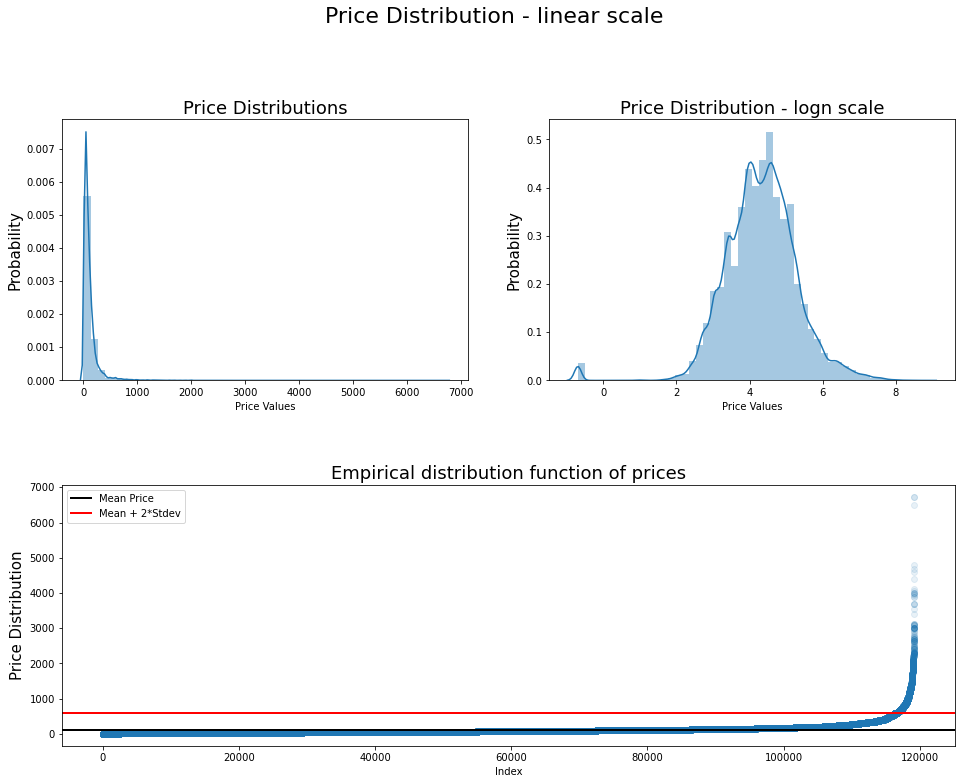

In [8]:
df_train['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16,12))
plt.suptitle('Price Distribution - linear scale', fontsize=22)
plt.subplot(221)
g = sns.distplot(df_train['price'])
g.set_title("Price Distributions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(df_train['price']+1.5))
g1.set_title("Price Distribution - logn scale", fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(df_train.shape[0]),
                 np.sort(df_train['price'].values), 
                 alpha=.1)
g4= plt.title("Empirical distribution function of prices", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean(), color='black', 
           label='Mean Price', linewidth=2)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean() + (2.5*df_train[df_train['price'] != -1]['price'].std()),
                 color='red', 
           label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

In [9]:
df_train['price'].describe()

count    119151.000000
mean        119.798644
std         183.742769
min          -1.000000
25%          39.900000
50%          73.900000
75%         132.700000
max        6735.000000
Name: price, dtype: float64

These graphs gives to us a clearly vision about the price distributions<br />
Mean Value is: 119.80<br />
Standard Deviation is: 183.74.<br />
In the graph, all product prices that cross the bound of Mean(119.80) + 2.5x the Stdev(183.74) were set as outliers.<br />
The bound to define outliers is BRL 580.92</p>


## Payment type

In [10]:
df_train['price_log'] = np.log(df_train['price'] + 1.5)

In [11]:
df_train['price_log'].describe()

count    119151.000000
mean          4.309755
std           0.991483
min          -0.693147
25%           3.723281
50%           4.322807
75%           4.899331
max           8.815296
Name: price_log, dtype: float64

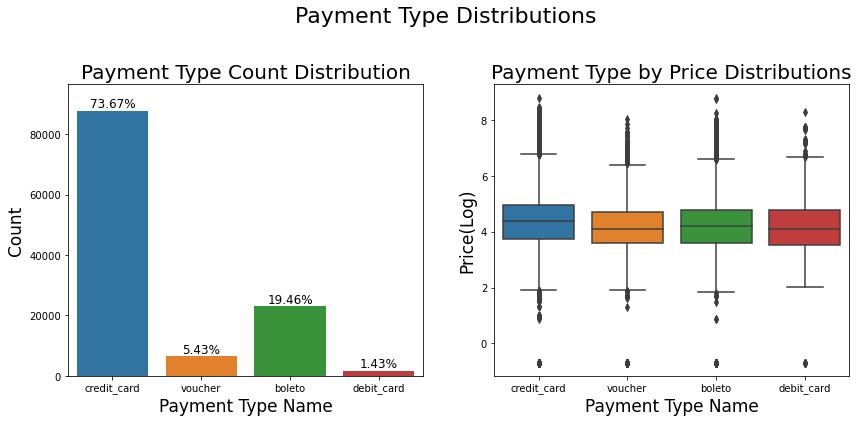

In [12]:
total = len(df_train)

plt.figure(figsize=(14,6))

plt.suptitle('Payment Type Distributions', fontsize=22)

plt.subplot(121)
g = sns.countplot(x='payment_type', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type Count Distribution", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
    
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(122)
g = sns.boxplot(x='payment_type', y='price_log', data=df_train[df_train['payment_type'] != 'not_defined'])
g.set_title("Payment Type by Price Distributions", fontsize=20)
g.set_xlabel("Payment Type Name", fontsize=17)
g.set_ylabel("Price(Log)", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.8)

plt.show()

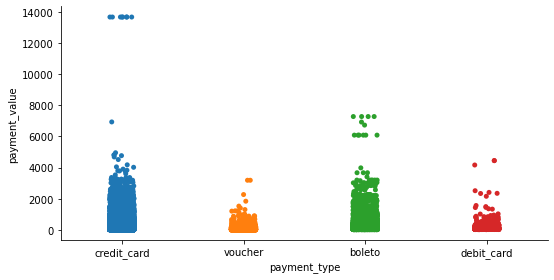

In [13]:
ax = sns.catplot(x="payment_type", y="payment_value",data=df_train[df_train['payment_type'] != 'not_defined'], aspect=2, height=3.8)

About 73.67% of all sales uses Credit Card as payment type.<br />
Second most common Payment Type is "boleto"(invoice) with almost 19.46%.<br />
The third more common payment type is voucher with 5.43%.<br />
We also have some payments from debit card and only 3 sales to not_defined

## Installments

In [14]:
ins_count = df_train[df_train['payment_type'] != 'not_defined'].groupby('payment_installments').size()
ins_count.index = ins_count.index.astype(int)
ins_mean = df_train[df_train['payment_type'] != 'not_defined'].groupby('payment_installments')['payment_value'].mean()
ins_mean.index = ins_mean.index.astype(int)
ins_mean.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 20, 21, 22, 23, 24],
           dtype='int64', name='payment_installments')

Text(0, 0.5, 'Value')

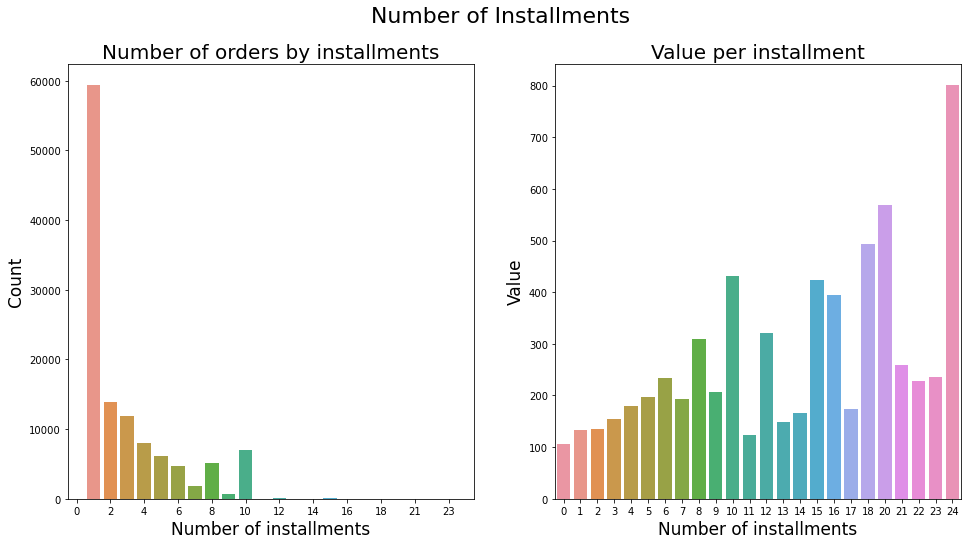

In [15]:
plt.figure(figsize=(16,8))
plt.suptitle('Number of Installments', fontsize=22)
print("\n")

plt.subplot(121)
g=sns.barplot(x=ins_count.index, y=ins_count.values)
g.set_title("Number of orders by installments", fontsize=20)
g.set_xlabel("Number of installments", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticks(range(0,24,2))

plt.subplot(122)
g1=sns.barplot(x=ins_mean.index, y=ins_mean.values)
g1.set_title("Value per installment", fontsize=20)
g1.set_xlabel("Number of installments", fontsize=17)
g1.set_ylabel("Value", fontsize=17)


## OBS: zero parcelas tem valor?
Most sellers in Brazil offer the option to divide the payment up to 10 installments and the mean product value increases until this number. Seven and nine installments are not usual.

The next plot shows the number of orders (left) and the total value (right) for payments with a single installment. The distribution is quite difference here.

         index  payment_type
0  credit_card         28083
1       boleto         23190
2      voucher          6465
3   debit_card          1706
4  not_defined             3
  payment_type  payment_value
0       boleto     4110920.74
1  credit_card     3071515.84
2   debit_card      257374.89
3  not_defined           0.00
4      voucher      435917.84


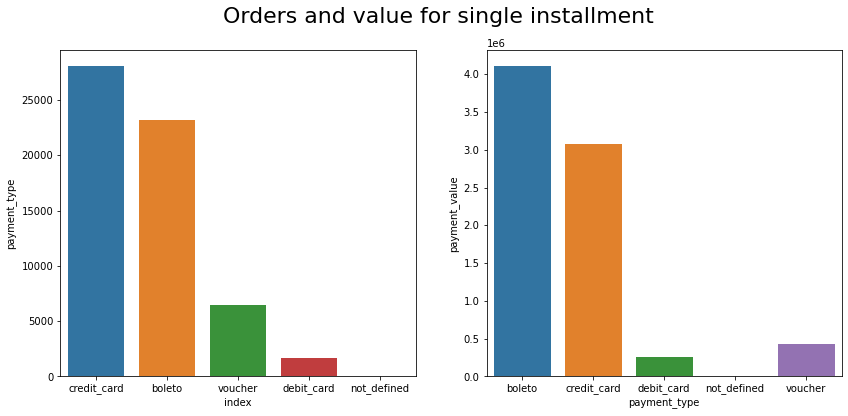

In [16]:
pay_one_inst = df_train[df_train['payment_installments'] == 1]
method_count = pay_one_inst['payment_type'].value_counts().to_frame().reset_index()
print(method_count.head())
method_value = pay_one_inst.groupby('payment_type')['payment_value'].sum().to_frame().reset_index()
print(method_value.head())

plt.figure(figsize=(14,6))
plt.suptitle('Orders and value for single installment', fontsize=22)

plt.subplot(121)
g=sns.barplot(x = method_count['index'], y = method_count.payment_type)

plt.subplot(122)
g=sns.barplot(x = method_value.payment_type, y = method_value.payment_value)


## Customers by state

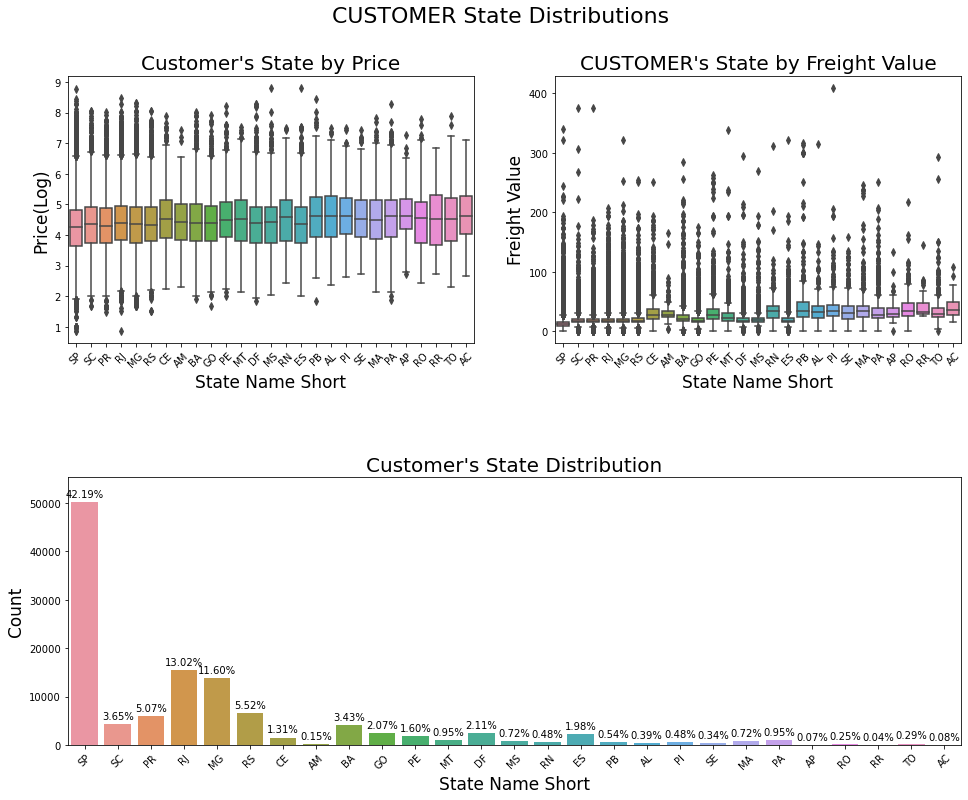

In [17]:
plt.figure(figsize=(16,12))

plt.suptitle('CUSTOMER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='customer_state', data=df_train, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

    
    

g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='customer_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Customer's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)




plt.subplot(222)
g3 = sns.boxplot(x='customer_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45,)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Cool! We can see that the most common state of CUSTOMERS is SP(42.19%), followed by RJ(13.02%) and MG(11.6%).
All this states is from the southeast region of Brazil. Also, we have many sales to RS, PR, SC (states from south region)

## Sellers by state

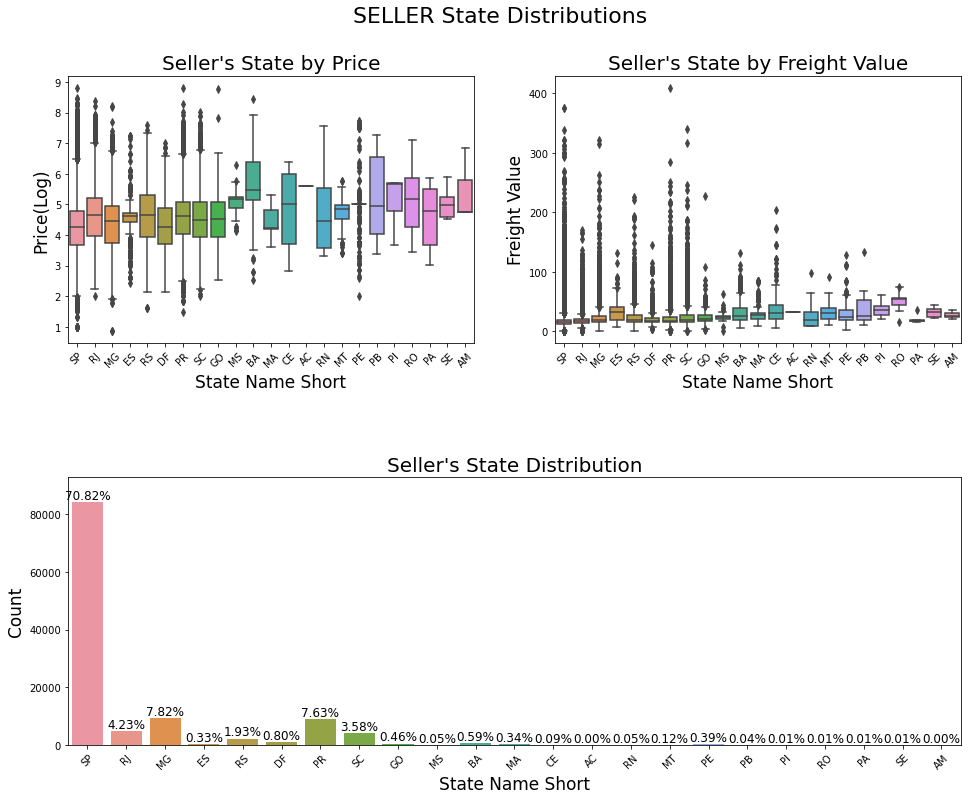

In [18]:
plt.figure(figsize=(16,12))

plt.suptitle('SELLER State Distributions', fontsize=22)

plt.subplot(212)
g = sns.countplot(x='seller_state', data=df_train, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(221)
g2 = sns.boxplot(x='seller_state', y='price_log', 
                 data=df_train[df_train['price'] != -1])
g2.set_title("Seller's State by Price", fontsize=20)
g2.set_xlabel("State Name Short", fontsize=17)
g2.set_ylabel("Price(Log)", fontsize=17)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplot(222)
g3 = sns.boxplot(x='seller_state', y='freight_value', 
                 data=df_train[df_train['price'] != -1])
g3.set_title("Seller's State by Freight Value", fontsize=20)
g3.set_xlabel("State Name Short", fontsize=17)
g3.set_ylabel("Freight Value", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Different of what we saw in Customer states, sellers have almost 70% of sellers products solds from SP, followed by MG and PR.

## Mean Freight by States
The objective here is to get the mean value when Seller is from X State and Customer from Y State.<br />
I will select only the more frequent states to a better view

In [19]:
# Setting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df_train.loc[df_train['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df_train.loc[df_train['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df_train.loc[df_train['customer_state'].isin(norte), 'cust_Region'] = 'North'
df_train.loc[df_train['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df_train.loc[df_train['customer_state'].isin(sul), 'cust_Region'] = 'South'

## Freight Value mean from State to Regions

In [20]:
cross_heatmap(df_train[df_train['price'] != -1], ['seller_state', 'cust_Region'], 
              values=df_train[df_train['price'] != -1]['freight_value'], aggfunc='mean')

cust_Region,Midwest,North,Northeast,South,Southeast
seller_state,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.070164,58.371935,27.607364,27.096786,19.636728
ES,36.895833,68.896250,36.664464,39.894510,28.461445
GO,14.686705,26.595909,33.369841,30.535870,24.201088
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.861624,41.899053,33.968349,28.904398,21.153626


Very interesting distributions.<br />
We can see that:

SP sellers have a lowest mean of freights to all regions.<br />
CE sellers have high mean value<br />
We can note that the sellers from southeast could have a better competitive advantage.<br />

## Order Item Id
I think that this column is the total items bought.<br />
Let's explore the distribution of this feature

In [21]:
df_train['ord_new'] = df_train['order_item_id'].copy()

df_train.loc[df_train['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
df_train.loc[(df_train['order_item_id'] > 10), 'ord_new'] = '10 to 20'

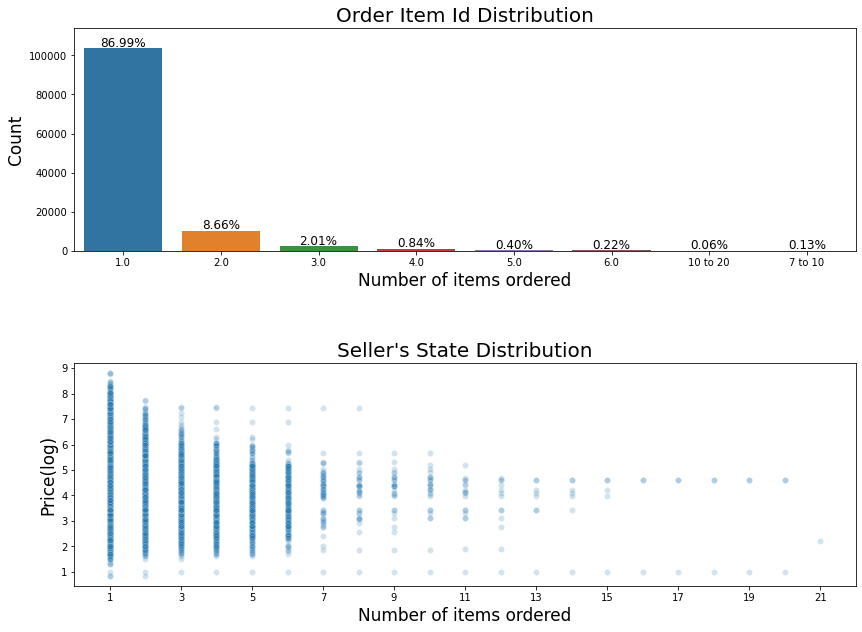

In [22]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=df_train)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("Number of items ordered", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

plt.subplot(212)
g1 = sns.scatterplot(x='order_item_id', y='price_log',
                     data=df_train, alpha=.2)
g1.set_title("Seller's State Distribution", fontsize=20)
g1.set_xlabel("Number of items ordered", fontsize=17)
g1.set_ylabel("Price(log)", fontsize=17)
#g1.set_xlim(0,28)
g1.set_xticks(range(1,22,2))

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

86.99% of items ordered are of only one item? It's a long tail case.

## Total items by Review Score

In [23]:
round(pd.crosstab(df_train['order_item_id'], df_train['review_score'], normalize='index') *100,2)[:12].T

order_item_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
review_score,,,,,,,,,,,,
1,11.42,22.49,26.13,29.35,30.72,34.34,42.62,43.24,51.72,53.85,50.00,53.85
2,3.22,5.81,6.43,6.53,6.14,4.15,3.28,0.00,0.00,0.00,0.00,0.00
3,8.30,9.30,9.31,8.84,8.90,9.81,13.11,13.51,13.79,15.38,16.67,7.69
4,19.33,15.95,15.69,15.38,15.89,15.47,14.75,18.92,17.24,11.54,16.67,15.38
5,57.73,46.46,42.45,39.90,38.35,36.23,26.23,24.32,17.24,19.23,16.67,23.08


I think that it's very insightful.<br />
We can note that orders with few quantities have highest review_score's.<br />
Why it happens?

In [24]:
df_train.drop(['order_item_id','product_id', 'seller_id', 'review_id', 'customer_unique_id'], axis=1, inplace=True)